<h1 align='center'>Animal recognition (CIFAR 10)</h1>

Patryk Kośmider s16863 i Krzysztof Marek s16663

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import json
from tensorflow.keras import layers
from tensorflow.keras import models

Ładujemy przygotowany dataset

In [2]:
def load_dataset():
    with open('cars_dataset.json', 'r') as file:
        data = json.load(file)
        X_train = np.array(data['X_train'])
        y_train = np.array(data['y_train'])
        X_test = np.array(data['X_test'])
        y_test = np.array(data['y_test'])
        classes = data['classes']
        return X_train, y_train, X_test, y_test, classes

In [3]:
X_train, y_train, X_test, y_test, classes = load_dataset()

Funkcja do wyświetlania obrazka

In [4]:
def show_image(X, y, index):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X[index], interpolation = 'nearest')
    plt.xlabel(classes[y[index]])

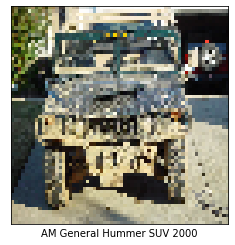

In [5]:
show_image(X_train, y_train, 0)

Normalizacja danych treningowych. Mimo, że operacje na zmiennach całkowitych są szybsze to jednak mniej dokładne. Lepsze wyniki osiągane są na zmiennach zmiennoprzecinkowych.

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Tworzymy model `Convolutional neural network`

In [7]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = X_train[0].shape),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(len(classes) * 10, activation = 'relu'),
    layers.Dense(len(classes), activation = 'softmax')
])

Kompilujemy nasz model. Używamy `sparse_categorical_crossentropy` gdyż wynik końcowy jest indeksem konkretnej klasy, pojedynczą wartością.

In [8]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = [ 'accuracy' ])

Trenujemy nasz model

In [9]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
255/255 [==============================] - 15s 57ms/step - loss: 5.2700 - accuracy: 0.0065
Epoch 2/10
255/255 [==============================] - 14s 57ms/step - loss: 5.1282 - accuracy: 0.0152
Epoch 3/10
255/255 [==============================] - 14s 57ms/step - loss: 4.9720 - accuracy: 0.0333
Epoch 4/10
255/255 [==============================] - 14s 57ms/step - loss: 4.6397 - accuracy: 0.0660
Epoch 5/10
255/255 [==============================] - 15s 58ms/step - loss: 3.9337 - accuracy: 0.1528
Epoch 6/10
255/255 [==============================] - 15s 58ms/step - loss: 2.5822 - accuracy: 0.4097
Epoch 7/10
255/255 [==============================] - 15s 59ms/step - loss: 0.9676 - accuracy: 0.7741
Epoch 8/10
255/255 [==============================] - 15s 59ms/step - loss: 0.2455 - accuracy: 0.9501
Epoch 9/10
255/255 [==============================] - 15s 59ms/step - loss: 0.1161 - accuracy: 0.9795
Epoch 10/10
255/255 [==============================] - 15s 58ms/step - loss: 0.044

Sprawdzamy jakość treningu

In [10]:
cnn.evaluate(X_test, y_test)

252/252 [==============================] - 3s 11ms/step - loss: 10.4328 - accuracy: 0.0614


[10.432826042175293, 0.061435144394636154]

Dokonujemy predykcji

In [11]:
y_pred = cnn.predict(X_test)

Wybieramy najbardziej prawdobodobną klasę obiektu

In [12]:
y_classes = [ np.argmax(element) for element in y_pred ]

'AM General Hummer SUV 2000'

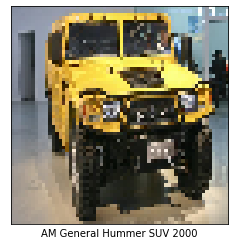

In [13]:
i = 11
show_image(X_test, y_test, i)
classes[y_classes[i]]

### Paper

3D Object Representations for Fine-Grained Categorization

Jonathan Krause, Michael Stark, Jia Deng, Li Fei-Fei

4th IEEE Workshop on 3D Representation and Recognition, at ICCV 2013 (3dRR-13). Sydney, Australia. Dec. 8, 2013.

https://ai.stanford.edu/~jkrause/papers/3drr13.pdf